# Predict Bollywood movie success

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
data = pd.read_csv("BollywoodBoxOfficeSuccess.csv", encoding="cp1252")

In [2]:
data.columns

Index(['Movie_Name', 'Release_Date(N/LW/Festive)', 'Genre-Defind',
       'Movie_Content', 'Dir_CAT', 'LEAD_ACTOR_CAT', 'Item_Song(Y/N)',
       'Production_House_CAT', 'Music_Dir_CAT', 'Box_Office_Collection',
       'Profit', 'Earning_Ratio', 'Budget', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes', 'Success/Faliure'],
      dtype='object')

In [3]:
data.drop('Movie_Name', axis = 1, inplace=True)
y = data[['Success/Faliure']]

In [4]:
data = data.select_dtypes(exclude=['object'])

In [5]:
data['Success/Faliure'] = y

In [6]:
data.head()

,Item_Song(Y/N),Box_Office_Collection,Profit,Earning_Ratio,Budget,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Success/Faliure
0,1,27,15,2.30,12,13798789,15708,5226,1
1,1,25,7,1.39,18,8788913,18907,2940,0
2,0,14,-6,0.70,20,6698987,6750,2234,0
3,0,32,19,2.47,13,5592977,15464,1513,1
4,0,22,-27,0.45,48,5192338,6928,1120,0


In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

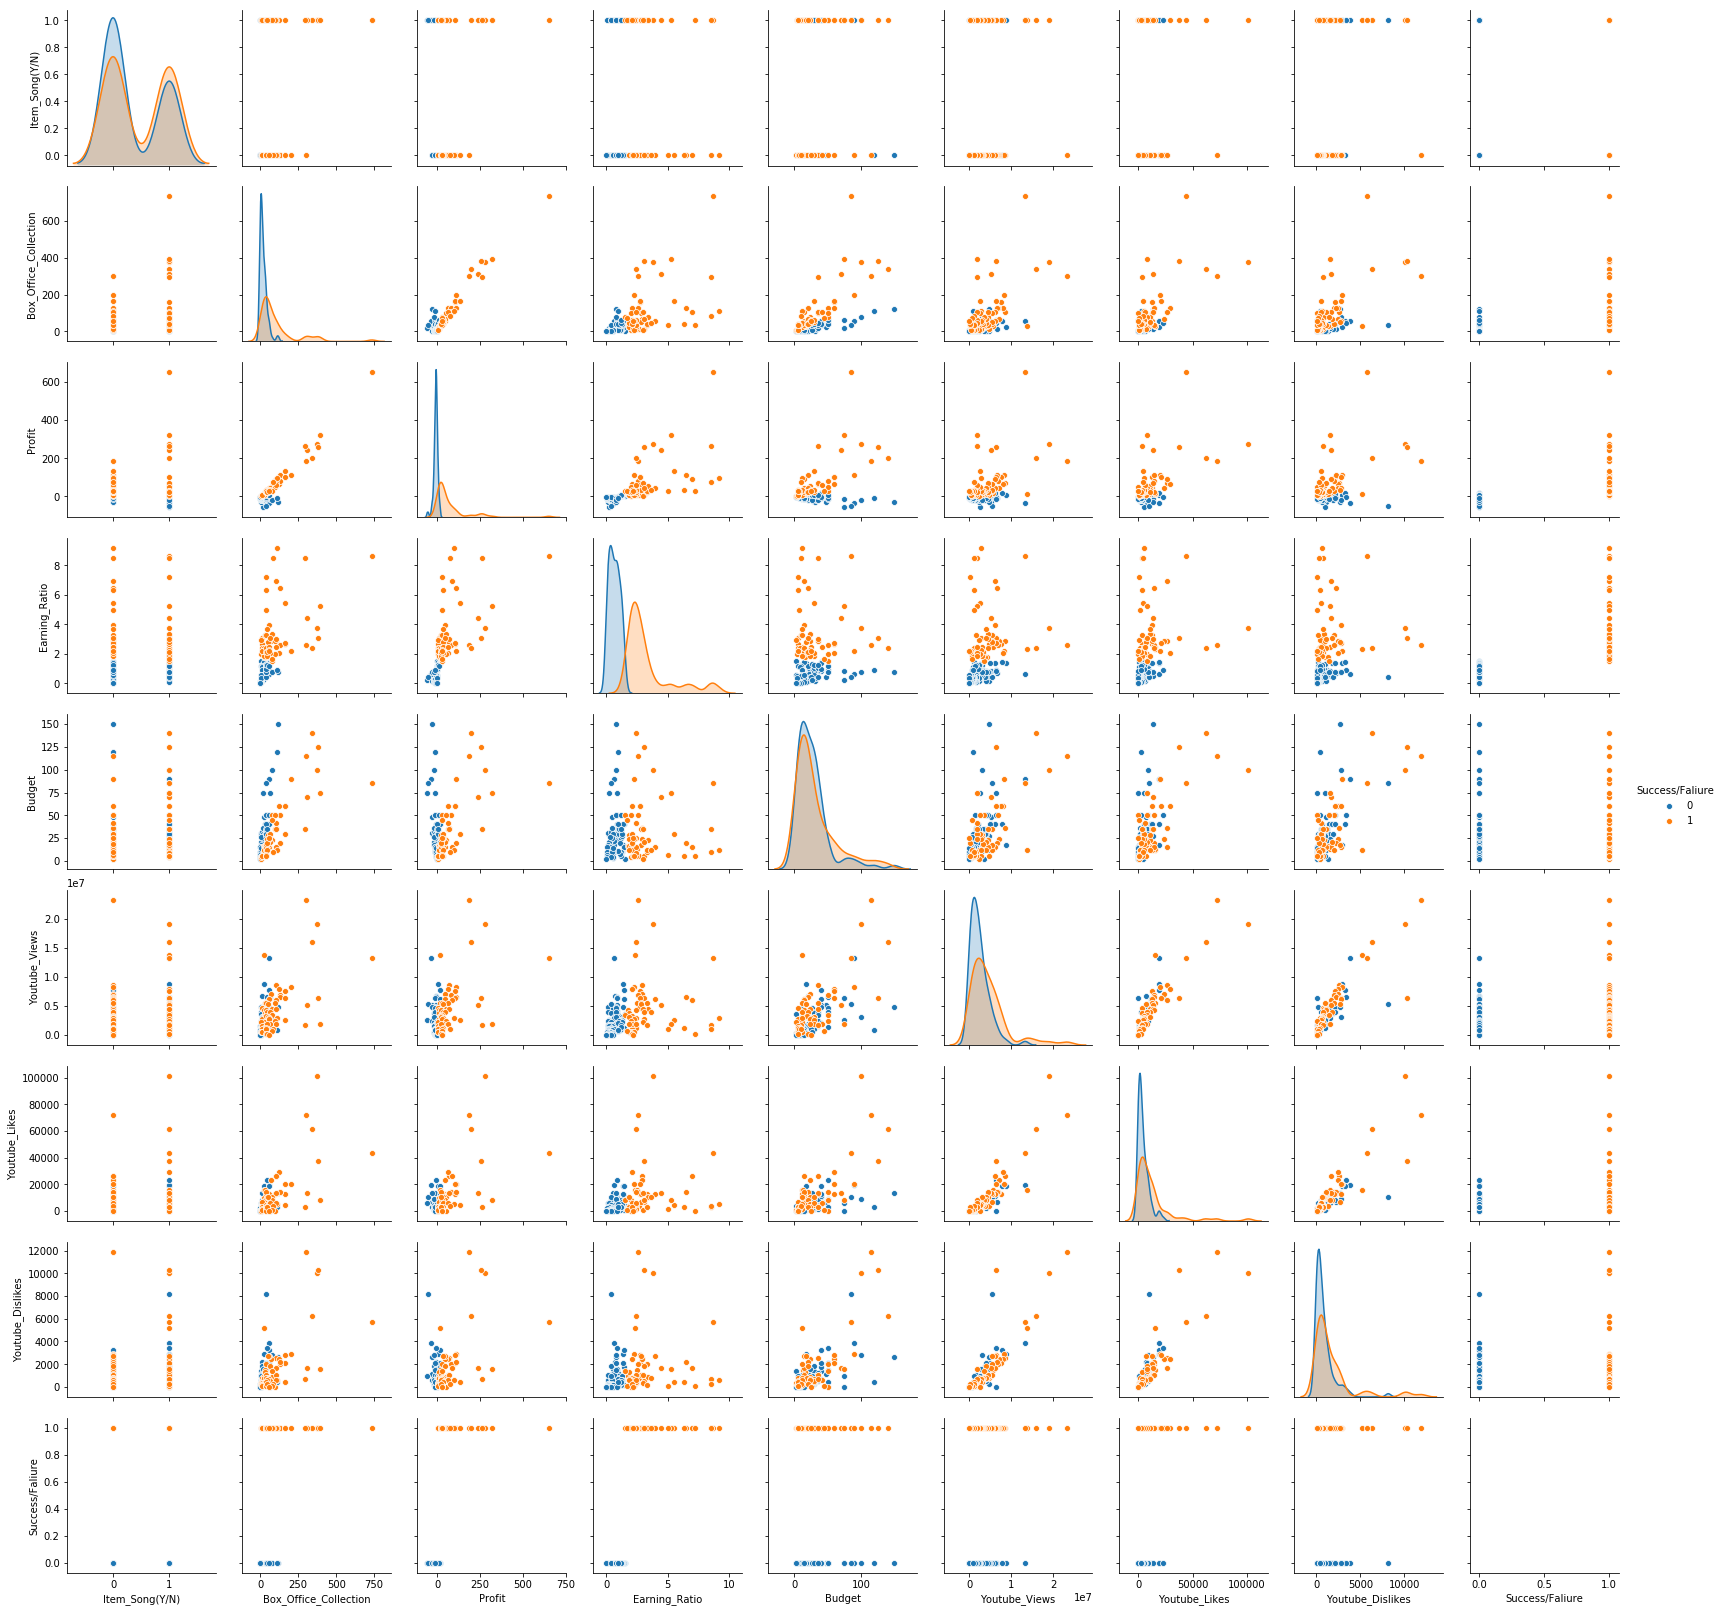

In [13]:
sns.pairplot(data,hue='Success/Faliure')

In [14]:
X = data.drop('Success/Faliure', axis = 1)
y = data[['Success/Faliure']]
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)
knn=KNeighborsClassifier(n_neighbors=3)
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))

What is the Testing Accuracy
0.9333333333333333
What is the Training Accuracy
0.9915966386554622


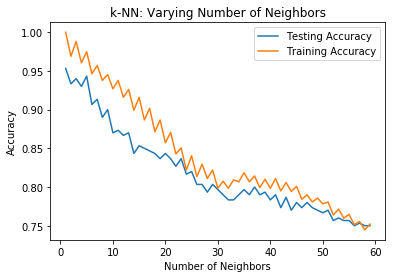

In [15]:
from matplotlib import pyplot as plt
import numpy as np

neighbors = np.arange(1, 60)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

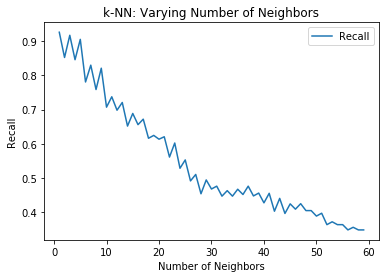

In [16]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
import numpy as np
neighbors = np.arange(1, 60)
recall_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    recall=[]
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        recall.append(recall_score(y_test,predicted))
    #Compute accuracy on the training set
    recall_plot[i] = np.mean(recall)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, recall_plot, label = 'Recall')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.show()

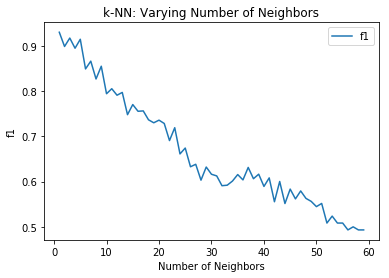

In [17]:
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
neighbors = np.arange(1, 60)
f1_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    f1=[]
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        f1.append(f1_score(y_test,predicted))
    #Compute accuracy on the training set
    f1_plot[i] = np.mean(f1)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, f1_plot, label = 'f1')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('f1')
plt.show()